In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

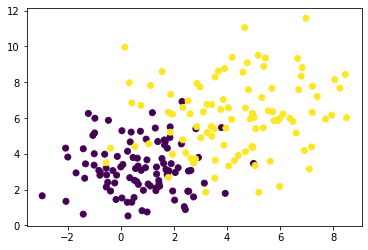

In [2]:
num_points = 100
mean_1 = [1, 3]
cov_1 = [[2, 0], [0, 2]]
x_1 = np.random.multivariate_normal(mean_1, cov_1, num_points)
 
mean_2 = [4, 6]
cov_2 = [[4, 0], [0, 4]]
x_2 = np.random.multivariate_normal(mean_2, cov_2, num_points)

x = np.concatenate([x_1, x_2])
labels = np.array([0] * num_points + [1] *  num_points)

plt.scatter(x[:,0], x[:,1], c=labels)

In [3]:
def sigmoid(elem):
    return 1/(1 + np.exp(-elem))

def compute_cost(Array, array_labels, theta):
    m = len(array_labels)
    h = sigmoid(Array @ theta)
    epsilon = 1e-5
    cost = (1/m)*(((-array_labels).T @ np.log(h + epsilon))-((1-array_labels).T @ np.log(1-h + epsilon)))
    return cost

def gradient_descent(Array, array_labels, params, learning_rate, iterations):
    m = len(array_labels)
    cost_history = np.zeros((iterations,1))

    for i in range(iterations):
        params = params - (learning_rate/m) * (Array.T @ (sigmoid(Array @ params) - array_labels))
        cost_history[i] = compute_cost(Array, array_labels, params)

    return cost_history, params

def predict(Array, params):
    return np.round(sigmoid(Array @ params))

Optimal Parameters are: 
 [[-2.94542546]
 [ 0.72709511]
 [ 0.33740106]] 

0.895


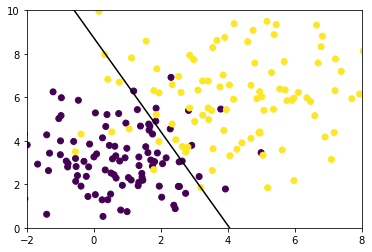

In [4]:
%matplotlib inline
new_x = np.hstack((np.ones((len(labels),1)),x))
new_labels = labels[:,np.newaxis]
n = np.size(new_x,1)
params = np.zeros((n,1))
iterations = 1500
learning_rate = 0.03
initial_cost = compute_cost(new_x, new_labels, params)
(cost_history, params_optimal) = gradient_descent(new_x, new_labels, params, learning_rate, iterations)

print("Optimal Parameters are: \n", params_optimal, "\n")

# plt.figure()
# plt.plot(range(len(cost_history)), cost_history, 'r')
# plt.title("Convergence Graph of Cost Function")
# plt.xlabel("Number of Iterations")
# plt.ylabel("Cost")
# plt.show()

labels_pred = predict(new_x, params_optimal)
score = float(sum(labels_pred == new_labels))/ float(len(new_labels))

print(score)

slope = -(params_optimal[1] / params_optimal[2])
intercept = -(params_optimal[0] / params_optimal[2])
plt.scatter(new_x[:,1],new_x[:,2],c=new_labels.reshape(-1))

ax = plt.gca()
ax.set_xlim([-2,8])
ax.set_ylim([0,10])
x_vals = np.array(ax.get_xlim())
y_vals = intercept + (slope * x_vals)
plt.plot(x_vals, y_vals, c="k")
